In [ ]:

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"


In [ ]:
%cd /content/gdrive/MyDrive/Kaggle

/content/gdrive/MyDrive/Kaggle


In [ ]:
!kaggle datasets download -d fpeccia/weed-detection-in-soybean-crops

100% 2.36G/2.37G [00:24<00:00, 128MB/s]
100% 2.37G/2.37G [00:24<00:00, 104MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: dataset/soybean/3137.tif  
  inflating: dataset/soybean/3138.tif  
  inflating: dataset/soybean/3139.tif  
  inflating: dataset/soybean/314.tif  
  inflating: dataset/soybean/3140.tif  
  inflating: dataset/soybean/3141.tif  
  inflating: dataset/soybean/3142.tif  
  inflating: dataset/soybean/3143.tif  
  inflating: dataset/soybean/3144.tif  
  inflating: dataset/soybean/3145.tif  
  inflating: dataset/soybean/3146.tif  
  inflating: dataset/soybean/3147.tif  
  inflating: dataset/soybean/3148.tif  
  inflating: dataset/soybean/3149.tif  
  inflating: dataset/soybean/315.tif  
  inflating: dataset/soybean/3150.tif  
  inflating: dataset/soybean/3151.tif  
  inflating: dataset/soybean/3152.tif  
  inflating: dataset/soybean/3153.tif  
  inflating: dataset/soybean/3154.tif  
  inflating: dataset/soybean/3155.tif  
  inflating: dataset/soybean/3156.tif  
  inflating: dataset/soybean/3157.tif  
  in

In [ ]:
#Créer des répertoires

# Le répertoire où nous allons enregistrer le jeu de données s'appelle "weedandcrops"
base_dir = './weedandcrops'
os.makedirs(base_dir, exist_ok=True)
# direction pour notre train, validation et test
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)

validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok=True)

test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

#direction pour notre train grass,soil,soybean, weed
train_grass_dir = os.path.join(train_dir, 'grass')
os.makedirs(train_grass_dir, exist_ok=True)

train_soil_dir = os.path.join(train_dir, 'soil')
os.makedirs(train_soil_dir, exist_ok=True)

train_soybean_dir = os.path.join(train_dir, 'soybean')
os.makedirs(train_soybean_dir, exist_ok=True)

train_weed_dir = os.path.join(train_dir, 'weed')
os.makedirs(train_weed_dir, exist_ok=True)

#direction pour notre  validation de grass,soil,soybean, weed
validation_grass_dir = os.path.join(validation_dir, 'grass')
os.makedirs(validation_grass_dir, exist_ok=True)

validation_soil_dir = os.path.join(validation_dir, 'soil')
os.makedirs(validation_soil_dir, exist_ok=True)

validation_soybean_dir = os.path.join(validation_dir, 'soybean')
os.makedirs(validation_soybean_dir, exist_ok=True)

validation_weed_dir = os.path.join(validation_dir, 'weed')
os.makedirs(validation_weed_dir, exist_ok=True)

#direction pour notre  test de grass,soil,soybean, weed
test_grass_dir = os.path.join(test_dir, 'grass')
os.makedirs(test_grass_dir, exist_ok=True)

test_soil_dir = os.path.join(test_dir, 'soil')
os.makedirs(test_soil_dir, exist_ok=True)

test_soybean_dir = os.path.join(test_dir, 'soybean')
os.makedirs(test_soybean_dir, exist_ok=True)

test_weed_dir = os.path.join(test_dir, 'weed')
os.makedirs(test_weed_dir, exist_ok=True)

In [ ]:
# Nous copions les images dans les répertoires correspondants
#This image dataset has 15336 segments, being 3249 of soil, 7376 of soybean, 3520 grass and 1191 of broadleaf weeds.
#60%train, 20% validation, 20%test

#3249 soil: 1949 train, 650 valid, 650 test
#7376 soybean:4426 train, 1475 valid, 1475 test
#3520 grass: 2112 train, 704 valid, 704 test
#1191 weed: 715 train, 238 valid,238 test

#15336 Total: 9202 train, 3067 valid, 3067 test

import shutil
#Fichier original à partir duquel nous allons copier les images
original_dataset_dir_soil = './dataset/soil'
original_dataset_dir_soybean = './dataset/soybean'
original_dataset_dir_grass = './dataset/grass'
original_dataset_dir_weed = './dataset/broadleaf'

####SOIL####
# Copiez les 1949 premières images du sol pour former le répertoire du sol
fnames = ['{}.tif'.format(i) for i in range(1,1950)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_soil, fname)
    dst = os.path.join(train_soil_dir, fname)
    shutil.copyfile(src, dst)

# Les 650 suivants à valider soil_dir
fnames = ['{}.tif'.format(i) for i in range(1950, 2600)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_soil, fname)
    dst = os.path.join(validation_soil_dir, fname)
    shutil.copyfile(src, dst)
    
# Copiez les 650 suivants dans test_soil_dir
fnames = ['{}.tif'.format(i) for i in range(2600, 3250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_soil, fname)
    dst = os.path.join(test_soil_dir, fname)
    shutil.copyfile(src, dst)
    
####SOJA####
# Copiez les 4426 premières images de soja dans train_soybean_dir
fnames = ['{}.tif'.format(i) for i in range(1,4427)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_soybean, fname)
    dst = os.path.join(train_soybean_dir, fname)
    shutil.copyfile(src, dst)
# Les 1475 suivants à validation_soybean_dir
fnames = ['{}.tif'.format(i) for i in range(4427, 5902)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_soybean, fname)
    dst = os.path.join(validation_soybean_dir, fname)
    shutil.copyfile(src, dst)
# Nous copions les 1475 suivants dans test_soybean_dir
fnames = ['{}.tif'.format(i) for i in range(5902, 7377)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_soybean, fname)
    dst = os.path.join(test_soybean_dir, fname)
    shutil.copyfile(src, dst)

####GrasN####
# Copiez les 2112 premières images d'herbe dans train_grass_dir
fnames = ['{}.tif'.format(i) for i in range(1,2113)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_grass, fname)
    dst = os.path.join(train_grass_dir, fname)
    shutil.copyfile(src, dst)
# Le prochain 704 à valider grass_dir
fnames = ['{}.tif'.format(i) for i in range(2113, 2817)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_grass, fname)
    dst = os.path.join(validation_grass_dir, fname)
    shutil.copyfile(src, dst)
# Nous copions le 704 suivant dans test_grass_dir   
fnames = ['{}.tif'.format(i) for i in range(2817, 3521)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_grass, fname)
    dst = os.path.join(test_grass_dir, fname)
    shutil.copyfile(src, dst)
    
####WEED####
# Copiez les 715 premières images de mauvaises herbes dans train_weed_dir
fnames = ['{}.tif'.format(i) for i in range(1,716)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_weed, fname)
    dst = os.path.join(train_weed_dir, fname)
    shutil.copyfile(src, dst)
# Les 238 suivants à valider weed_dir
fnames = ['{}.tif'.format(i) for i in range(716, 954)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_weed, fname)
    dst = os.path.join(validation_weed_dir, fname)
    shutil.copyfile(src, dst)
    
# copier  les 238 suivants  a test_weed_dir
fnames = ['{}.tif'.format(i) for i in range(954, 1192)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_weed, fname)
    dst = os.path.join(test_weed_dir, fname)
    shutil.copyfile(src, dst)

## Modele

In [ ]:
import keras
keras.__version__
from keras import layers
from keras import models
from keras import optimizers

In [ ]:
#Définir le modèle
#Droput est utilisé pour généraliser et éviter le surajustement

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150,150,3))) #(3 canales iniciales*32 nodos*3pix*3pix)+32 bias= 896 param
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #(32 nodos posteriores*64 nodos*3pix*3pix)+64 bias= 18496 param
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu')) #(64 nodos posteriores*128 nodos*3pix*3pix)+128 bias= 73856 param
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu')) #(128 nodos posteriores*128 nodos*3pix*3pix)+128 bias= 147584 param
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) #7*7*128 del max pooling anterior
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu')) #(6272 de la capa anterior *512 capa densa)+512 bias = 3211776
model.add(layers.Dense(4, activation='softmax')) #(512 capa anterior*4 capa densa)+4 bias = 2052
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
#Définir la fonction de perte et l'optimiseur
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

## Data augmentation and re-escaling

In [ ]:
# Ceci est un module avec des utilitaires pour le prétraitement d'image
from keras.preprocessing import image

#ImageDataGenerator generates batches of tensor image data with real-time data augmentation. The data will be looped over (in batches).
#Rather than performing the operations on your memory, the API is designed to be iterated by the deep learning model fitting process, 
#creating augmented image data for you just-in-time. 
from keras.preprocessing.image import ImageDataGenerator
#>>>>Instancier ImageDataGenerator pour augmenter les données du train /255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

#>>>>Notez que les données de validation ne doivent pas être augmentées. seulement /255

#>>>>Instancier ImageDataGenerator pour /255 données de test
test_datagen = ImageDataGenerator(rescale=1./255)


####Générer de nouvelles données de train et redimensionner####
#Flow_from_directory: Is useful when the images are placed in there respective label folders. This method will identify classes automatically from the folder name.
train_generator = train_datagen.flow_from_directory(
        # direction de train
        train_dir,
        # Redimensionner toutes les images à 150x150
        target_size=(150, 150),
        color_mode="rgb",
        #batch_size: No. of images to be yielded from the generator per batch.
        #The number of images within each folder is not required to be divisible by the batch size. 
        #If there were a remainder, if you had 234 images when using a batch size of 10, then the last batch would just be smaller. 
        #It would be a batch of 4 in this case.
        batch_size=92,
        # Puisque nous utilisons la perte categorical_crossentropy comme perte, nous avons besoin de balises de type catégorique.
        class_mode='categorical')
####Mise à l'échelle des données de validation####
#Flow_from_directory: Is useful when the images are placed in there respective label folders. This method will identify classes automatically from the folder name.
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        color_mode="rgb",
        batch_size=31,
        class_mode='categorical')

####Mise à l'échelle des données  de test####
#Flow_from_directory: Is useful when the images are placed in there respective label folders. This method will identify classes automatically from the folder name.
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        color_mode="rgb",
        batch_size=31,
        class_mode='categorical')

Found 9202 images belonging to 4 classes.
Found 3067 images belonging to 4 classes.
Found 3067 images belonging to 4 classes.


## Training

In [ ]:
##Pour définir steps_per_epochh
import math
training_samples =9202
batch_size_training_generator=92
validation_samples =3067
batch_size_validation_generator=31

history = model.fit_generator(
      train_generator,
      ##In each epoch, the ImageDataGenerator applies a transformation on the images you have and use the transformed images for training. 
      #You need to set the steps_per_epoch argument of FIT METHOD to n_samples / batch_size, n_samples is the total number of training data you have (ex:1000 in your case).
      #This way in each epoch, each training sample is augmented only one time and therefore 1000 transformed images will be generated in each epoch.
      # These augmented images are not stored in the memory, they are generated on the fly while training and lost after training
    
      #steps_per_epoch: The steps_per_epoch argument must specify the number of batches of samples comprising one epoch. 
      #For example, if your original dataset has 10,000 images and your batch size is 32, then a reasonable value for steps_per_epoch 
      #when fitting a model on the augmented data might be ceil(10,000/32), or 313 batches. 
      #Parce que les données sont générées à l'infini, le code doit savoir combien d'échantillons tirer du générateur avant de déclarer une époque
      steps_per_epoch=math.ceil(training_samples/batch_size_training_generator),
      epochs=15,
      validation_data=validation_generator,
      validation_steps=math.ceil(validation_samples/batch_size_validation_generator))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/15
101/101 [==============================] - 547s 5s/step - loss: 1.1316 - acc: 0.5692 - val_loss: 0.5399 - val_acc: 0.8099
Epoch 2/15
101/101 [==============================] - 546s 5s/step - loss: 0.6727 - acc: 0.7591 - val_loss: 0.4990 - val_acc: 0.8122
Epoch 3/15
101/101 [==============================] - 588s 6s/step - loss: 0.5783 - acc: 0.7849 - val_loss: 0.4255 - val_acc: 0.7965
Epoch 4/15
101/101 [==============================] - 583s 6s/step - loss: 0.4798 - acc: 0.8231 - val_loss: 0.6127 - val_acc: 0.7594
Epoch 5/15
101/101 [==============================] - 572s 6s/step - loss: 0.3833 - acc: 0.8517 - val_loss: 0.3446 - val_acc: 0.8601
Epoch 6/15
101/101 [==============================] - 563s 6s/step - loss: 0.3422 - acc: 0.8726 - val_loss: 0.3847 - val_acc: 0.8477
Epoch 7/15
101/101 [==============================] - 536s 5s/step - loss: 0.3237 - acc: 0.8833 - val_loss: 0.2237 - val_acc: 0.9051
Epoch 8/15
101/101 [==============================] - 509s 5s/step - 

In [ ]:
##Enregistrer le modèle
model.save('model_weedcrops.h5')

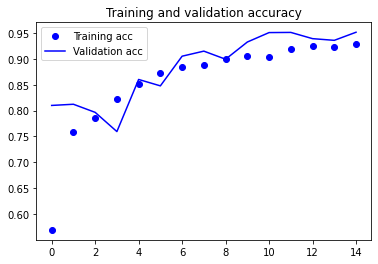

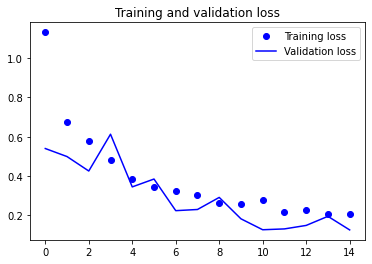

In [ ]:
##Analyse du résultat d'accy et perte de train et validation
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Test

In [ ]:
test_samples =3067
batch_size_test=31

score= model.evaluate_generator(test_generator, steps = math.ceil(test_samples/batch_size_test))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  after removing the cwd from sys.path.


In [ ]:
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))


Test accuracy: 94.8%


## Predict

In [ ]:
#When predicting, you have to respect this shape even if you have only one image. Your input should be of shape: [1, image_width, image_height, number_of_channels]
from PIL import Image
import numpy as np
from skimage import transform

def load(filename):
   np_image = Image.open(filename) #Open the image
   np_image = np.array(np_image).astype('float32')/255 #Creates a numpy array as float and divides by 255.
   np_image = transform.resize(np_image, (150, 150, 3)) #Resize a 150x150 con 3 channels
  # Remettez-le à l'échelle (1, 150, 150, 3)
   #Since you trained your model on mini-batches, your input is a tensor of shape [batch_size, image_width, image_height, number_of_channels].
   np_image = np.expand_dims(np_image, axis=0) #Insert a new axis that will appear at the axis position in the expanded array shape.
   return np_image
#Afficher les étiquettes
label_map = (test_generator.class_indices)
print (label_map)
#Nous prenons une image du test. La bonne étiquette est mauvaise herbe
image_to_predict = load('./weedandcrops/test/weed/1030.tif')
result = model.predict(image_to_predict)
result= np.around(result,decimals=3)
result=result*100
print (result)



{'grass': 0, 'soil': 1, 'soybean': 2, 'weed': 3}
[[37.3  0.   0.3 62.4]]


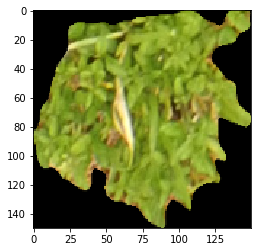

In [ ]:
# Transformez l'image de (1, 150, 150, 3) en (150, 150, 3) et affichez-la
image_to_predict= np.squeeze(image_to_predict,axis=0)
image_to_predict.shape

from matplotlib import pyplot as plt
plt.imshow(image_to_predict, interpolation='nearest')
plt.show()